In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2023/2023-02-14/age_gaps.csv"
age_gaps = pd.read_csv(url)

age_gaps.columns = age_gaps.columns.str.lower()

# parse dates
date_cols = [c for c in age_gaps.columns if "birthdate" in c]
for c in date_cols:
    age_gaps[c] = pd.to_datetime(age_gaps[c], errors="coerce")

age_gaps.info()
age_gaps.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_name          1155 non-null   object        
 1   release_year        1155 non-null   int64         
 2   director            1155 non-null   object        
 3   age_difference      1155 non-null   int64         
 4   couple_number       1155 non-null   int64         
 5   actor_1_name        1155 non-null   object        
 6   actor_2_name        1155 non-null   object        
 7   character_1_gender  1155 non-null   object        
 8   character_2_gender  1155 non-null   object        
 9   actor_1_birthdate   1155 non-null   datetime64[ns]
 10  actor_2_birthdate   1155 non-null   datetime64[ns]
 11  actor_1_age         1155 non-null   int64         
 12  actor_2_age         1155 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(6)
memory

,movie_name,release_year,director,age_difference,couple_number,actor_1_name,actor_2_name,character_1_gender,character_2_gender,actor_1_birthdate,actor_2_birthdate,actor_1_age,actor_2_age
0,Harold and Maude,1971,Hal Ashby,52,1,Ruth Gordon,Bud Cort,woman,man,1896-10-30,1948-03-29,75,23
1,Venus,2006,Roger Michell,50,1,Peter O'Toole,Jodie Whittaker,man,woman,1932-08-02,1982-06-03,74,24
2,The Quiet American,2002,Phillip Noyce,49,1,Michael Caine,Do Thi Hai Yen,man,woman,1933-03-14,1982-10-01,69,20
3,The Big Lebowski,1998,Joel Coen,45,1,David Huddleston,Tara Reid,man,woman,1930-09-17,1975-11-08,68,23
4,Beginners,2010,Mike Mills,43,1,Christopher Plummer,Goran Visnjic,man,man,1929-12-13,1972-09-09,81,38


Core rows (non-missing year/gap/ages): 1155
count    1155.000000
mean       10.424242
std         8.511086
min         0.000000
50%         8.000000
75%        15.000000
90%        23.000000
95%        27.000000
99%        35.460000
max        52.000000
Name: age_difference, dtype: float64


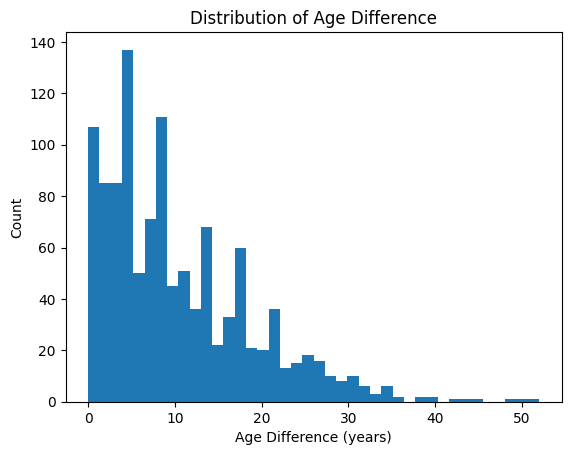

,movie_name,release_year,age_difference,actor_1_name,actor_1_age,actor_2_name,actor_2_age
0,Harold and Maude,1971,52,Ruth Gordon,75,Bud Cort,23
1,Venus,2006,50,Peter O'Toole,74,Jodie Whittaker,24
2,The Quiet American,2002,49,Michael Caine,69,Do Thi Hai Yen,20
3,The Big Lebowski,1998,45,David Huddleston,68,Tara Reid,23
4,Beginners,2010,43,Christopher Plummer,81,Goran Visnjic,38
5,Poison Ivy,1992,42,Tom Skerritt,59,Drew Barrymore,17
6,Whatever Works,2009,40,Larry David,62,Evan Rachel Wood,22
7,Entrapment,1999,39,Sean Connery,69,Catherine Zeta-Jones,30
8,Husbands and Wives,1992,38,Woody Allen,57,Juliette Lewis,19
9,Magnolia,1999,38,Jason Robards,77,Julianne Moore,39


In [ ]:
# Identify gender columns
g1 = "actor_1_gender"
g2 = "actor_2_gender"

# Drop rows that are missing key fields
core = age_gaps.dropna(subset=["release_year", "age_difference", "actor_1_age", "actor_2_age"])
print("Core rows (non-missing year/gap/ages):", core.shape[0])

# 1) Distribution of age gaps

print(core["age_difference"].describe(percentiles=[0.5, 0.75, 0.9, 0.95, 0.99]))

plt.figure()
plt.hist(core["age_difference"], bins=40)
plt.title("Distribution of Age Difference")
plt.xlabel("Age Difference (years)")
plt.ylabel("Count")
plt.show()

# Show top 15 largest age gaps
cols_to_show = [c for c in ["movie_name", "release_year", "age_difference",
                            "actor_1_name", "actor_1_age", g1,
                            "actor_2_name", "actor_2_age", g2] if c in core.columns]
display(core.sort_values("age_difference", ascending=False)[cols_to_show].head(15))

Correlation (Pearson):  -0.204
Correlation (Spearman): -0.141


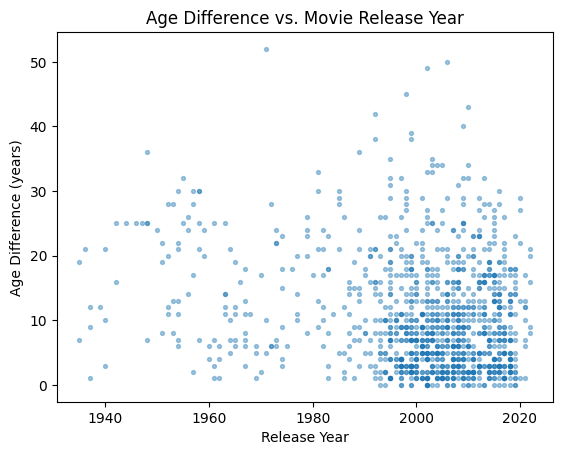

In [ ]:
# 2) Release year vs. age gap

# 2a) Correlation values
pearson = core["release_year"].corr(core["age_difference"], method="pearson")
spearman = core["release_year"].corr(core["age_difference"], method="spearman")
print(f"Correlation (Pearson):  {pearson:.3f}")
print(f"Correlation (Spearman): {spearman:.3f}")

# 2b) correlation scatter plot
plt.figure()
plt.scatter(core["release_year"], core["age_difference"], s=8, alpha=0.4)
plt.title("Age Difference vs. Movie Release Year")
plt.xlabel("Release Year")
plt.ylabel("Age Difference (years)")
plt.show()

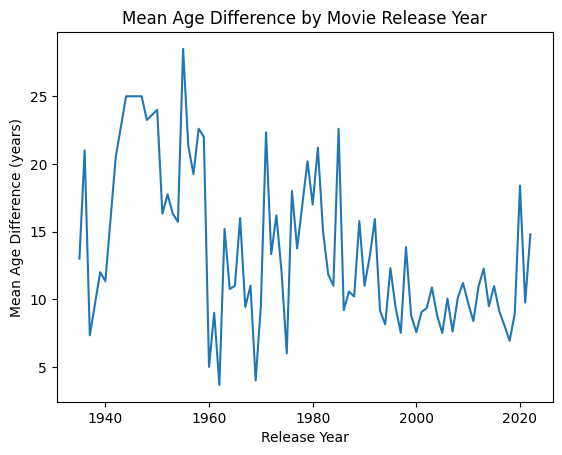

In [ ]:
# 2c) Mean Age Difference by Movie Release Year
by_year = core.groupby("release_year")["age_difference"].agg(["count", "mean", "median"]).reset_index()

plt.figure()
plt.plot(by_year["release_year"], by_year["mean"])
plt.title("Mean Age Difference by Movie Release Year")
plt.xlabel("Release Year")
plt.ylabel("Mean Age Difference (years)")
plt.show()

/tmp/ipython-input-2249349169.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  era_stats = core.groupby("era")["age_difference"].agg(["count", "mean", "median", "std"]).reset_index()


,era,count,mean,median,std
0,<=1959,53,18.528302,21.0,8.817822
1,60s,35,9.600000,7.0,6.376427
2,70s,30,15.300000,14.5,10.488582
3,80s,50,14.420000,13.5,9.084838
4,90s,222,10.445946,8.0,8.924229
5,2000s,409,9.268949,7.0,8.030947
6,2010s,338,9.431953,7.5,7.676109
7,2020>=,18,13.555556,12.5,8.008982


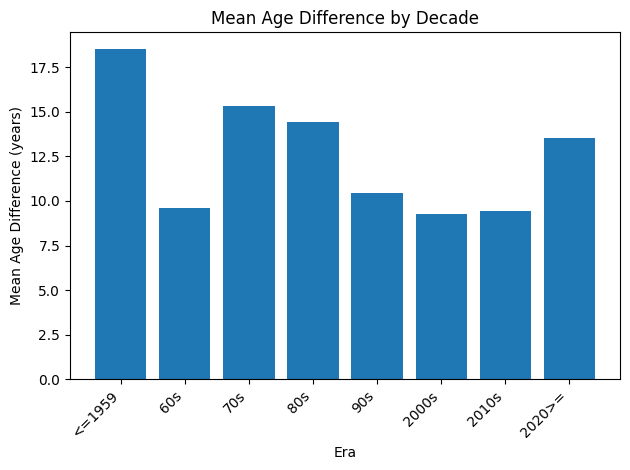

In [ ]:
# 2d) Mean Age Difference each Decade
bins = [1900, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
labels = ["<=1959","60s","70s","80s","90s","2000s","2010s","2020>="]
core["era"] = pd.cut(core["release_year"], bins=bins, labels=labels, include_lowest=True)

era_stats = core.groupby("era")["age_difference"].agg(["count", "mean", "median", "std"]).reset_index()
display(era_stats)

plt.figure()
plt.bar(era_stats["era"].astype(str), era_stats["mean"])
plt.title("Mean Age Difference by Decade")
plt.xlabel("Era")
plt.ylabel("Mean Age Difference (years)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
# 3a) Is the older partner usually the man?

g1 = "character_1_gender"
g2 = "character_2_gender"

# Define who is older based on gaps
core["actor_1_older"] = core["actor_1_age"] > core["actor_2_age"]
core["actor_2_older"] = core["actor_2_age"] > core["actor_1_age"]
core["same_age"] = core["actor_1_age"] == core["actor_2_age"]

def older_is_man(row):
    if pd.isna(row[g1]) or pd.isna(row[g2]):
        return np.nan
    if row["actor_1_older"]:
        return row[g1] == "man"
    if row["actor_2_older"]:
        return row[g2] == "man"
    return np.nan

core["older_is_man"] = core.apply(older_is_man, axis=1)

p_older_is_man = core["older_is_man"].mean(skipna=True)
print(f"P(older partner is a man) = {p_older_is_man:.3f}")

# Show gender pairing counts
pair_counts = core.groupby([g1, g2]).size().reset_index(name="count").sort_values("count", ascending=False)
display(pair_counts)

P(older partner is a man) = 0.826


,character_1_gender,character_2_gender,count
1,man,woman,929
2,woman,man,203
0,man,man,12
3,woman,woman,11


/tmp/ipython-input-3640243544.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  older_by_era = core.groupby("era")["older_is_man"].agg(["count", "mean"]).reset_index()


,era,count,mean
0,<=1959,53,0.981132
1,60s,35,0.828571
2,70s,30,0.933333
3,80s,50,0.840000
4,90s,216,0.865741
5,2000s,397,0.813602
6,2010s,326,0.785276
7,2020>=,18,0.666667


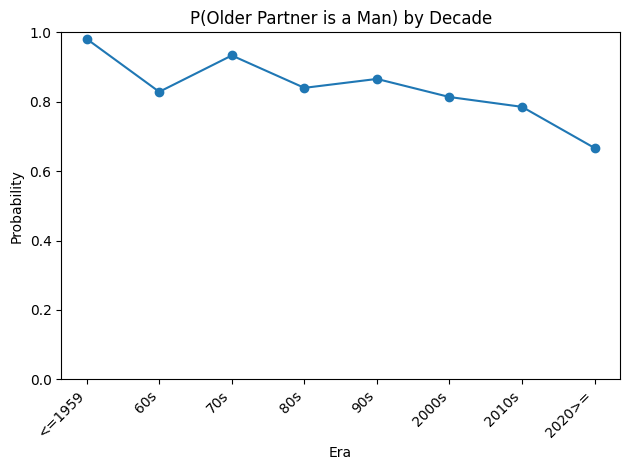

In [ ]:
# 3b) Are men older in the past, present, or is it the same?

older_by_era = core.groupby("era")["older_is_man"].agg(["count", "mean"]).reset_index()
older_by_era["mean"] = older_by_era["mean"].astype(float)
display(older_by_era)

plt.figure()
plt.plot(older_by_era["era"].astype(str), older_by_era["mean"], marker="o")
plt.title("P(Older Partner is a Man) by Decade")
plt.xlabel("Era")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

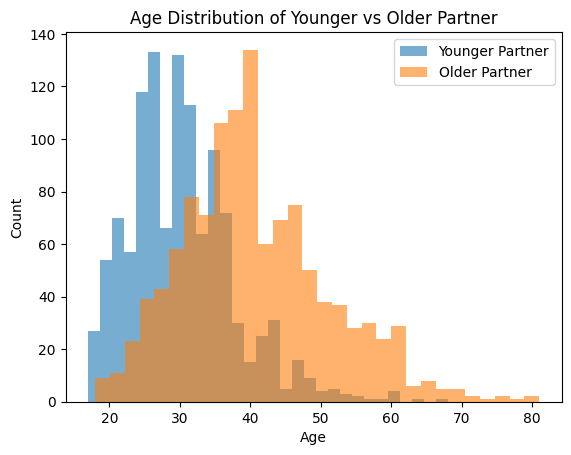

/tmp/ipython-input-355748343.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  asym_by_era = core.groupby("era")[["younger_age", "older_age"]].mean().reset_index()


,era,younger_age,older_age
0,<=1959,26.830189,45.358491
1,60s,28.085714,37.685714
2,70s,29.433333,44.733333
3,80s,28.900000,43.320000
4,90s,28.504505,38.950450
5,2000s,29.919315,39.188264
6,2010s,32.408284,41.840237
7,2020>=,35.666667,49.222222


In [ ]:
# 4) Are large age gaps primarily due to one partner being unusually young, unusually old, or both? How does this pattern vary by the decade?

# distributions
core["younger_age"] = core[["actor_1_age", "actor_2_age"]].min(axis=1)
core["older_age"] = core[["actor_1_age", "actor_2_age"]].max(axis=1)

# compare distributions
plt.figure()
plt.hist(core["younger_age"], bins=30, alpha=0.6, label="Younger Partner")
plt.hist(core["older_age"], bins=30, alpha=0.6, label="Older Partner")
plt.legend()
plt.title("Age Distribution of Younger vs Older Partner")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# display by decade
asym_by_era = core.groupby("era")[["younger_age", "older_age"]].mean().reset_index()
display(asym_by_era)

In [ ]:
# 5) Do some directors repeatedly feature larger or more asymmetric age gaps in their films?

# Identify the younger_age
core["younger_age"] = core[["actor_1_age", "actor_2_age"]].min(axis=1)

# Identify the relative_gap
core["relative_gap"] = core["age_difference"] / core["younger_age"]

# Aggregation
director_stats = (
    core.groupby("director")
        .agg(
            films=("movie_name", "count"),
            mean_gap=("age_difference", "mean"),
            median_gap=("age_difference", "median"),
            mean_relative_gap=("relative_gap", "mean")
        ).query("films >= 5")
        .sort_values("mean_gap", ascending=False))

display(director_stats.head(10))

,films,mean_gap,median_gap,mean_relative_gap
director,,,,
Alfred Hitchcock,7,21.000000,22.0,0.796663
Woody Allen,20,20.150000,18.5,0.764609
John Glen,15,19.866667,21.0,0.693077
Joel Coen,5,19.000000,11.0,0.867549
John Huston,6,18.500000,21.5,0.658257
Lewis Gilbert,7,17.000000,20.0,0.597503
Guy Hamilton,9,16.222222,18.0,0.615076
Garry Marshall,5,14.800000,18.0,0.548312
Marc Forster,5,13.800000,12.0,0.478617
